<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


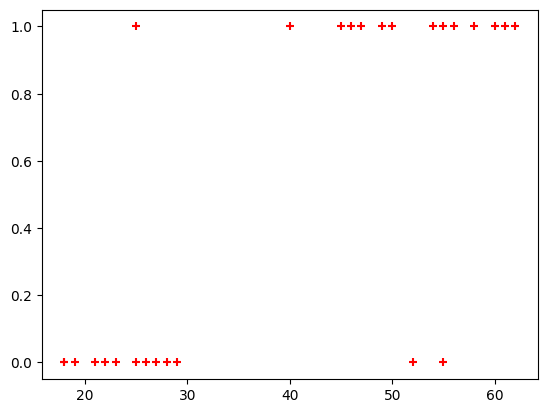

In [18]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [21]:
X_test

,age
6,55
3,52
2,47
7,60
18,19
23,45


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
X_test

,age
6,55
3,52
2,47
7,60
18,19
23,45


In [25]:
y_predicted = model.predict(X_test)

In [26]:
model.predict_proba(X_test)

array([[9.30775192e-04, 9.99069225e-01],
       [2.33593966e-03, 9.97664060e-01],
       [1.07603304e-02, 9.89239670e-01],
       [2.00500445e-04, 9.99799500e-01],
       [9.83376077e-01, 1.66239230e-02],
       [1.97104783e-02, 9.80289522e-01]])

In [27]:
model.score(X_test,y_test)

0.6666666666666666

In [28]:
y_predicted

array([1, 1, 1, 1, 0, 1])

In [29]:
X_test

,age
6,55
3,52
2,47
7,60
18,19
23,45


**model.coef_ indicates value of m in y=m*x + b equation**

In [30]:
model.coef_

array([[0.3071864]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [31]:
model.intercept_

array([-9.91669042])

**Lets defined sigmoid function now and do the math with hand**

In [32]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [33]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [34]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**
**0.485 is more than 0.5 which means person with 43 will buy the insurance**

In [35]:
age = 43
prediction_function(age)

0.568565299077705

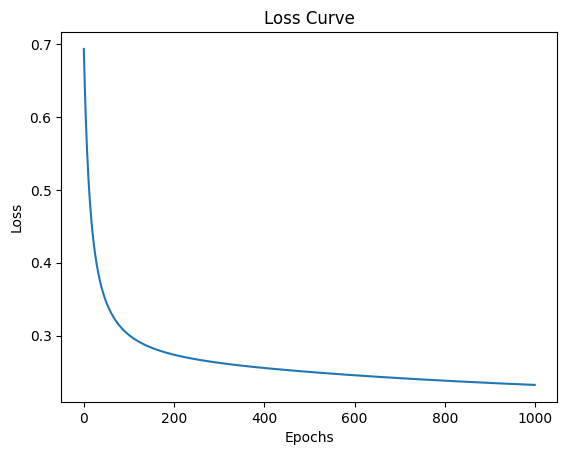

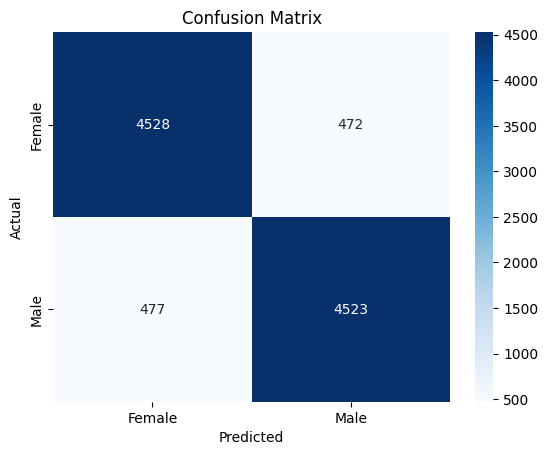

              precision    recall  f1-score   support

      Female       0.90      0.91      0.91      5000
        Male       0.91      0.90      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ---------------------------
# Step 1: Load dataset
# ---------------------------
df = pd.read_csv("/content/weight-height.csv")

# Encode Gender: Male = 1, Female = 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

X = df[['Height', 'Weight']].values
y = df['Gender'].values.reshape(-1, 1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias term (intercept)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # shape (n, 3)

# ---------------------------
# Step 2: Sigmoid Function
# ---------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ---------------------------
# Step 3: Loss Function (Binary Cross Entropy)
# ---------------------------
def compute_loss(y, y_pred):
    m = len(y)
    epsilon = 1e-8  # avoid log(0)
    return - (1/m) * np.sum(y * np.log(y_pred + epsilon) + (1-y) * np.log(1 - y_pred + epsilon))

# ---------------------------
# Step 4: Gradient Descent
# ---------------------------
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))  # initialize parameters
    loss_history = []

    for _ in range(epochs):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        error = y_pred - y

        grad = (1/m) * np.dot(X.T, error)
        theta -= lr * grad

        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

    return theta, loss_history

# ---------------------------
# Step 5: Train Model
# ---------------------------
theta, loss_history = gradient_descent(X, y, lr=0.1, epochs=1000)

# ---------------------------
# Step 6: Predictions
# ---------------------------
y_pred_prob = sigmoid(np.dot(X, theta))
y_pred = (y_pred_prob >= 0.5).astype(int)

# ---------------------------
# Step 7: Plot Loss Curve
# ---------------------------
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# ---------------------------
# Step 8: Confusion Matrix
# ---------------------------
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Female", "Male"],
            yticklabels=["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ---------------------------
# Step 9: Classification Report
# ---------------------------
print(classification_report(y, y_pred, target_names=["Female", "Male"]))


<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

Dataset loaded successfully.
First 5 rows of the dataset:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                   

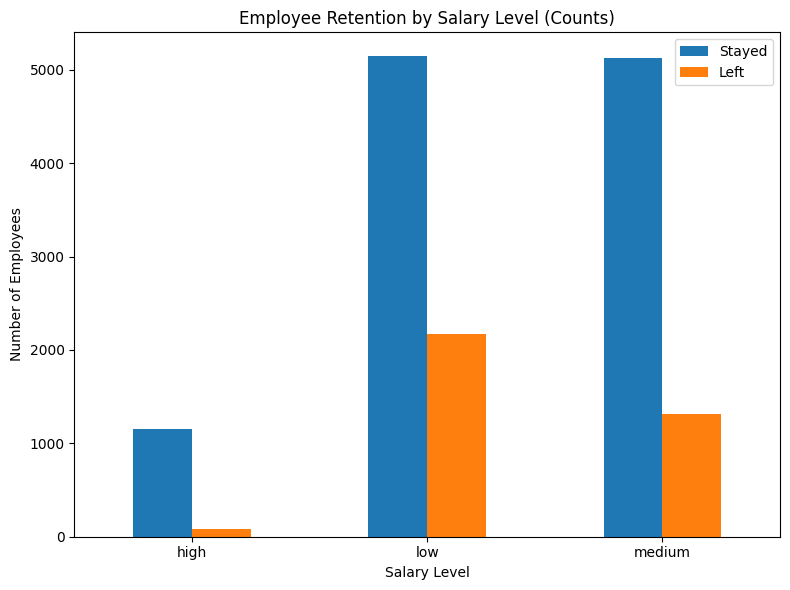


Proportions: Salary vs. Left
left           0         1
salary                    
high    0.933711  0.066289
low     0.703116  0.296884
medium  0.795687  0.204313


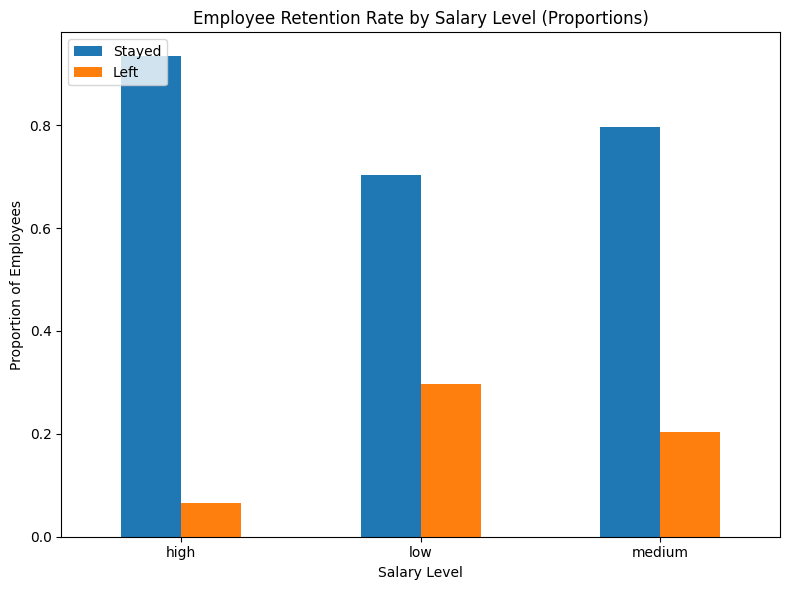


Observation: Employees with low salaries are much more likely to leave compared to those with medium or high salaries.


Plotting Department vs. Retention...

Crosstab: Department vs. Left
left            0     1
Department             
IT            954   273
RandD         666   121
accounting    563   204
hr            524   215
management    539    91
marketing     655   203
product_mng   704   198
sales        3126  1014
support      1674   555
technical    2023   697


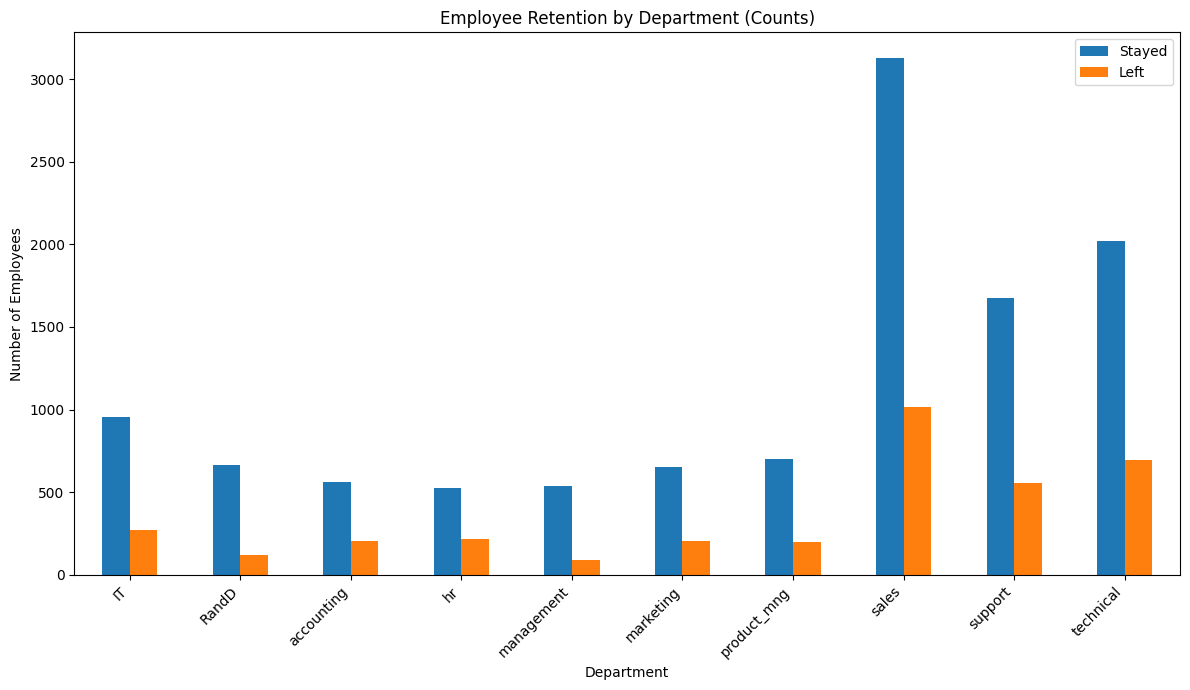


Proportions: Department vs. Left
left                0         1
Department                     
IT           0.777506  0.222494
RandD        0.846252  0.153748
accounting   0.734029  0.265971
hr           0.709066  0.290934
management   0.855556  0.144444
marketing    0.763403  0.236597
product_mng  0.780488  0.219512
sales        0.755072  0.244928
support      0.751009  0.248991
technical    0.743750  0.256250


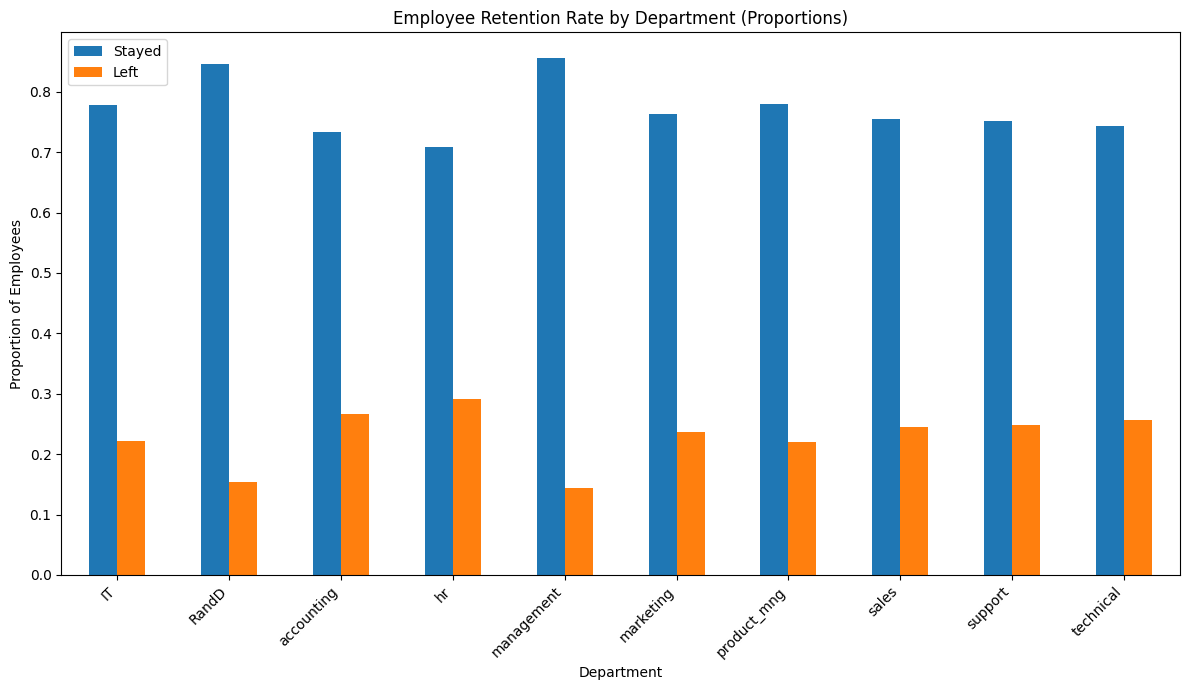


Observation: Retention rates vary somewhat by department, but the differences seem less pronounced than salary levels.
Sales, technical, and support departments have higher numbers of employees leaving (also higher total employees).
HR, accounting, and technical departments appear to have slightly higher proportions of employees leaving.


Building Logistic Regression Model...

Dataframe after one-hot encoding (first 5 rows):
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary_low  \
0      

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

try:
    df = pd.read_csv("HR_comma_sep.csv")
    print("Dataset loaded successfully.")
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
except FileNotFoundError:
    print("Error: HR_comma_sep.csv not found. Please ensure the file is in the correct directory.")
    exit()

print("\n" + "="*50 + "\n")

print("Starting Exploratory Data Analysis (EDA)...")

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDistribution of 'left' variable (1 = Left, 0 = Stayed):")
print(df['left'].value_counts())

print("\nMean values of numerical features grouped by 'left':")
numerical_df = df.select_dtypes(include=['number'])
print(numerical_df.groupby('left').mean())

print("\nEDA suggests 'satisfaction_level', 'average_montly_hours', and 'promotion_last_5years' have clear impacts.")
print("Categorical features ('Department', 'salary') will be analyzed with plots.")

print("\n" + "="*50 + "\n")

print("Plotting Salary vs. Retention...")

salary_left_crosstab = pd.crosstab(df['salary'], df['left'])
print("\nCrosstab: Salary vs. Left")
print(salary_left_crosstab)
salary_left_crosstab.plot(kind='bar', figsize=(8, 6))
plt.title('Employee Retention by Salary Level (Counts)')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(['Stayed', 'Left'])
plt.tight_layout()
plt.show()

salary_left_proportions = salary_left_crosstab.apply(lambda r: r/r.sum(), axis=1)
print("\nProportions: Salary vs. Left")
print(salary_left_proportions)

salary_left_proportions.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Employee Retention Rate by Salary Level (Proportions)')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.xticks(rotation=0)
plt.legend(['Stayed', 'Left'], loc='upper left')
plt.tight_layout()
plt.show()

print("\nObservation: Employees with low salaries are much more likely to leave compared to those with medium or high salaries.")

print("\n" + "="*50 + "\n")
print("Plotting Department vs. Retention...")

dept_left_crosstab = pd.crosstab(df['Department'], df['left'])
print("\nCrosstab: Department vs. Left")
print(dept_left_crosstab)

dept_left_crosstab.plot(kind='bar', figsize=(12, 7))
plt.title('Employee Retention by Department (Counts)')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(['Stayed', 'Left'])
plt.tight_layout()
plt.show()

dept_left_proportions = dept_left_crosstab.apply(lambda r: r/r.sum(), axis=1)
print("\nProportions: Department vs. Left")
print(dept_left_proportions)

dept_left_proportions.plot(kind='bar', stacked=False, figsize=(12, 7))
plt.title('Employee Retention Rate by Department (Proportions)')
plt.xlabel('Department')
plt.ylabel('Proportion of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(['Stayed', 'Left'], loc='upper left')
plt.tight_layout()
plt.show()

print("\nObservation: Retention rates vary somewhat by department, but the differences seem less pronounced than salary levels.")
print("Sales, technical, and support departments have higher numbers of employees leaving (also higher total employees).")
print("HR, accounting, and technical departments appear to have slightly higher proportions of employees leaving.")


print("\n" + "="*50 + "\n")

print("Building Logistic Regression Model...")

df_processed = pd.get_dummies(df, columns=['salary', 'Department'], drop_first=True)

print("\nDataframe after one-hot encoding (first 5 rows):")
print(df_processed.head())

features = ['satisfaction_level', 'average_montly_hours', 'promotion_last_5years',
            'time_spend_company', 'Work_accident',
            'salary_low', 'salary_medium',
            'Department_RandD', 'Department_accounting', 'Department_hr',
            'Department_management', 'Department_marketing',
            'Department_product_mng', 'Department_sales', 'Department_support',
            'Department_technical']

X = df_processed[features]
y = df_processed['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

print("\nModel training complete.")

print("\n" + "="*50 + "\n")

print("Measuring Model Accuracy...")

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_alt = model.score(X_test, y_test)

print(f"\nPredictions made on the test set.")
print(f"Accuracy using accuracy_score: {accuracy:.4f}")
print(f"Accuracy using model.score:    {accuracy_alt:.4f}")

print("\n" + "="*50 + "\n")
print("Analysis Complete.")